In [1]:
from dispel4py.workflow_graph import WorkflowGraph 
from dispel4py.provenance import *
import time
import random
from dispel4py.base import create_iterative_chain, ConsumerPE, IterativePE, SimpleFunctionPE

class Source(IterativePE):

    def __init__(self,index):
        IterativePE.__init__(self)
        #self._add_input('input')
        #self._add_output('output')
        self.index = index
        
    
    def _process(self,inputs):
        print inputs
        iter=inputs[0]
        while (iter<100):
            #time.sleep(0.5)
            val = random.random()
            self.write('output',val,metadata={'iter':iter})
            iter=iter+1
        
        
        


def readn(data):
    
    if (data>0.9):
        prov={'format':'Random float', 'metadata':{'value_s':str(data)}}
        return {'_d4p_prov':prov,'_d4p_data':data}
        
    
    
    
def multn(data):
    
    if (True):
        prov={'format':'Random float', 'metadata':{'value_z':data*data}}
        print data
        return {'_d4p_prov':prov,'_d4p_data':data*data}

    
    


sc = Source(0)
sc.name='source'


readiv=SimpleFunctionPE(readn)
mult=SimpleFunctionPE(multn)


processes=[readn,multn]
chain = create_iterative_chain(processes, FunctionPE_class=SimpleFunctionPE)

#Initialise the graph
graph = WorkflowGraph()

#Common way of composing the graph
graph.connect(sc,'output',readiv,'input')
graph.connect(readiv,'output',mult,'input')


# Alternatively with pipeline array
#Create pipelines from functions

#graph.connect(sc,'output',chain,'input')



graph.flatten()

#Prepare Input
input_data = {"source": [{"input": [(0,0)]}]}

#Launch in simple process
simple_process.process_and_return(graph, input_data)





SETTING NAME: Source
SETTING NAME: SimpleFunctionPE
SETTING NAME: SimpleFunctionPE
SETTING NAME: SimpleFunctionPE
SETTING NAME: SimpleFunctionPE
SETTING NAME: SimpleProcessingPE
[(0, 0)]
SimplePE: Processed 1 iteration.


{}

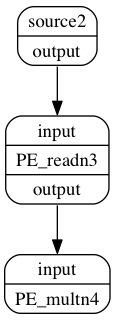

In [2]:
from dispel4py.visualisation import display

display(graph)

In [ ]:
ProvenanceRecorderToServiceBulk.REPOS_URL='http://verce-portal-dev.scai.fraunhofer.de/j2ep-1.0/prov/workflow/insert'
rid='RDWD_'+getUniqueId()
InitiateNewRun(graph,ProvenanceRecorderToServiceBulk,provImpClass=ProvenancePE,username='aspinuso',runId=rid,w3c_prov=False,workflowName="test_rdwd",workflowId="xx")

simple_process.process_and_return(graph, input_data)


from IPython.display import HTML
HTML("<iframe src='http://127.0.01:8080/provenance-explorer/html/d3js.jsp?level=PE&runId="+rid+"' width=800 height=800></iframe>")

In [ ]:

ProvenanceRecorderToServiceBulk.REPOS_URL='http://verce-portal-dev.scai.fraunhofer.de/j2ep-1.0/prov/workflow/insert'
rid='RDWD_'+getUniqueId()
#InitiateNewRun(graph,ProvenanceRecorderToServiceBulk,provImpClass=ProvenancePE,username='aspinuso',runId=rid,w3c_prov=False,workflowName="test_rdwd",workflowId="xx")

extra_args=['-n', '3']
dispel4py.new.processor.process_and_return(graph, input_data, 'multi',extra_args)



#from IPython.display import HTML
#HTML("<iframe src='http://127.0.01:8080/provenance-explorer/html/d3js.jsp?level=instances&runId="+rid+"' width=800 height=800></iframe>")

In [ ]:
from dispel4py.visualisation import display

display(graph)